In [2]:
import numpy as np
import math
import random
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Create a boolean matrix in TF of size 138*7. Set all values to 0 and replace 1000 values randomly with 1.

In [3]:
a = np.zeros((138*87), dtype=bool)
a[np.random.choice(138*87, 1000, replace=False)] = 1 
a = a.reshape(138, 87)

In [4]:
b = tf.zeros((138*87), dtype=bool)

In [5]:
a

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

In [6]:
b

<tf.Tensor: shape=(12006,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

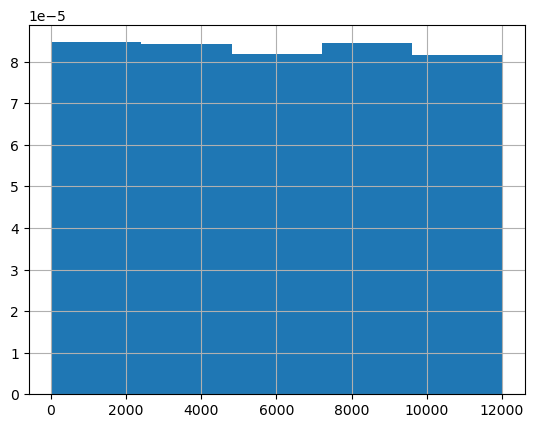

In [7]:
N = np.random.choice(138*87, 5000)
plt.hist(N, density=True, bins=5)
plt.grid()

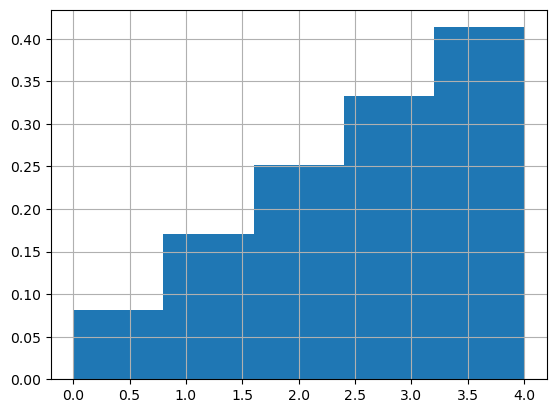

In [8]:
T = tf.random.categorical(tf.math.log([[i/sum(range(1,6)) for i in range(1,6)]]), 5000)
plt.hist(T, density=True, bins=5)
plt.grid()

### Create a linear layer class in Keras

In [9]:
class Linear(keras.layers.Layer):
    
    def __init__(self, units=32, input_dim=32):
        super().__init__()
        self.w = self.add_weight(shape=(input_dim, units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(units, ), initializer='zeros', trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [10]:
tf.ones((2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [11]:
linear_layer = Linear(4,2)

In [12]:
linear_layer(tf.ones((2,2)))

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.0335248 ,  0.09232893, -0.10511698,  0.17751282],
       [-0.0335248 ,  0.09232893, -0.10511698,  0.17751282]],
      dtype=float32)>

### Use build method to avoid having to specify input_dim

In [22]:
class Linear(keras.layers.Layer):
    
    def __init__(self, units=32):
        super().__init__()
        self.units = units
        
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(self.units, ), initializer='zeros', trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [73]:
class MLP(keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(10)
        
    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

In [ ]:
#get maximum column value of each row

In [76]:
mlp = MLP()

In [87]:
y = mlp(tf.ones((2,2)))

In [88]:
y

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[ 0.00226965, -0.00030104, -0.00066323, -0.00113268,  0.00098928,
        -0.00102598,  0.00255036, -0.00208812,  0.00128672, -0.0004142 ],
       [ 0.00226965, -0.00030104, -0.00066323, -0.00113268,  0.00098928,
        -0.00102598,  0.00255036, -0.00208812,  0.00128672, -0.0004142 ]],
      dtype=float32)>

In [98]:
class ActivityRegularization(keras.layers.Layer):
    
    def __init__(self, rate=1e-2):
        super().__init__()
        self.rate = rate
    
    def call(self, inputs):
        self.add_loss(self.rate * tf.reduce_sum(inputs))
        return inputs

In [94]:
tf.reduce_sum(tf.ones((14,10)))

<tf.Tensor: shape=(), dtype=float32, numpy=140.0>

In [95]:
mlp.losses

[]

In [99]:
class SparseMLP(keras.layers.Layer):
    
    def __init__(self):
        super().__init__()
        self.linear_1 = Linear(128)
        self.regularization = ActivityRegularization(1e-2)
        self.linear_3 = Linear(2)
    
    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.regularization(x)
        return self.linear_3(x)

In [100]:
mlp = SparseMLP()
y = mlp(tf.ones((200, 4)))

In [102]:
mlp.losses

[<tf.Tensor: shape=(), dtype=float32, numpy=9.239585>]

In [103]:
# write training loop for sparse mlp
# get dataset

# DQN
# collect transitions and go through network update process
# get max value of state-action pairs

In [104]:
(X_train, y_train), _ = keras.datasets.mnist.load_data()

In [112]:
dataset = tf.data.Dataset.from_tensor_slices(
    (X_train.reshape(60000, 784).astype('float32') / 255, y_train)
)
dataset = dataset.shuffle(buffer_size=1024).batch(64)

In [119]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [ ]:
# access different elements of dataset
# get dataset of Transitions

In [121]:
linear_layer = Linear(10)

In [122]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=1e-3)

In [123]:
for step, (x, y) in enumerate(dataset):
    with tf.GradientTape() as tape:
        logits = linear_layer(x)
        loss = loss_fn(y, logits)

In [124]:
for step, (x, y) in enumerate(dataset):
    print(step, x, y)

0 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[1 9 1 2 6 8 3 3 7 7 3 3 1 4 4 1 1 1 1 5 0 1 0 3 0 6 5 1 8 7 2 9 8 1 0 6 3
 0 6 7 2 1 3 9 0 9 8 2 0 6 3 2 7 7 2 4 5 9 8 4 1 7 2 0], shape=(64,), dtype=uint8)
1 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[1 3 9 2 3 5 3 4 8 7 6 4 8 6 7 7 3 5 2 8 6 7 0 6 7 6 2 8 8 0 1 8 8 3 1 8 7
 4 4 5 1 5 9 1 8 8 9 1 0 5 9 1 6 4 1 5 3 8 9 5 3 0 6 8], shape=(64,), dtype=uint8)
2 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[7 7 7 2 7 1 7 7 9 1 5 4 8 3 4 2 1 2 4 3 5 3 

653 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[9 2 6 1 2 7 9 1 5 5 7 9 5 5 2 1 8 6 2 4 5 4 6 4 3 3 2 8 2 2 9 4 2 4 1 8 0
 9 1 8 1 4 4 1 2 2 1 6 4 2 7 6 9 2 0 2 6 6 3 6 9 4 5 9], shape=(64,), dtype=uint8)
654 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[6 1 4 1 6 0 8 4 1 7 4 4 4 2 5 0 8 5 2 8 2 6 6 7 0 9 1 9 5 9 8 9 9 1 8 5 8
 7 0 6 4 0 2 0 7 6 2 1 0 5 3 2 3 1 2 4 8 0 1 0 4 2 4 1], shape=(64,), dtype=uint8)
655 tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(64, 784), dtype=float32) tf.Tensor(
[0 3 3 2 8 8 2 0 0 0 4 6 3 9 7 1 9 1 5 

In [ ]:
# how can you use this to create a Q-function? 

In [125]:
gradients = tape.gradient(loss, linear_layer.trainable_weights)

In [126]:
gradients

[<tf.Tensor: shape=(784, 10), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 0.01925976, -0.04702231,  0.02350223, -0.03408168,  0.03714239,
         0.03592405, -0.0605863 ,  0.01880208,  0.00815445, -0.00109467],
       dtype=float32)>]

In [128]:
optimizer.apply_gradients(zip(gradients, linear_layer.trainable_weights))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [131]:
tf.ones((5,12))

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [136]:
tf.random.normal((5, 12))

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[-1.3902409 ,  0.3376135 ,  0.5980615 ,  0.09227668, -0.33735225,
        -0.30059728,  0.11171184,  0.8164586 , -0.8186368 ,  0.39091098,
        -1.1122208 , -0.5202462 ],
       [-0.7222431 , -0.6754139 , -0.30880693,  1.499268  ,  1.7553138 ,
        -0.90848386,  0.5912767 ,  0.31160957, -1.0863758 , -0.96075946,
         1.6025138 ,  1.1579101 ],
       [ 0.8030726 ,  0.030274  , -0.6568327 , -0.1391894 ,  0.42893505,
         0.01398215,  0.705498  , -1.0691255 , -0.11823344, -0.9354754 ,
        -1.7021888 , -0.3399427 ],
       [ 0.8525477 ,  1.1742038 ,  1.441126  , -0.27787492, -0.3538462 ,
        -0.62756205,  0.6486064 , -1.299174  ,  0.71823895,  0.66697234,
        -0.42508882,  0.7414844 ],
       [-0.1256352 , -0.18768595, -0.37784266, -1.0257325 , -2.2446651 ,
         0.54834235, -1.2764839 , -0.39497972, -0.91640306, -2.6562762 ,
         0.00377731,  0.8197346 ]], dtype=float32)>

In [137]:
# get array/tensor as input to model
tf.random.normal((303,5))

<tf.Tensor: shape=(303, 5), dtype=float32, numpy=
array([[ 2.3226292 ,  0.44067085, -0.00505527, -0.35778213, -0.45443544],
       [-1.5054739 , -0.51589936, -1.2518678 ,  0.23008451,  0.67116535],
       [ 0.5258125 , -0.5094085 , -0.77391464, -0.15187834,  0.27871627],
       ...,
       [ 0.8601094 ,  1.8804001 , -0.82535285, -0.65727645,  0.39082083],
       [ 0.2963356 , -1.4382229 , -0.09343944,  0.23733619, -0.67924476],
       [-0.1449525 , -1.8043396 , -0.821042  , -0.0597247 , -0.44512546]],
      dtype=float32)>

In [140]:
def get_basic_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

In [141]:
model = get_basic_model()

In [143]:
model.fit(tf.random.normal((303,5)), tf.random.normal((303,)), epochs=15, batch_size=128)

Epoch 1/15
3/3 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.0000e+00
Epoch 5/15
3/3 [==============================] - 0s 996us/step - loss: 0.4430 - accuracy: 0.0000e+00
Epoch 6/15
3/3 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.0000e+00
Epoch 7/15
3/3 [==============================] - 0s 997us/step - loss: 0.4187 - accuracy: 0.0000e+00
Epoch 8/15
3/3 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.0000e+00
Epoch 9/15
3/3 [==============================] - 0s 997us/step - loss: 0.3944 - accuracy: 0.0000e+00
Epoch 10/15
3/3 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.00

In [166]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.random((5000,22))
y = np.random.random((5000,1))
 
X_train,X_test, y_train,y_test = train_test_split(X,y)
 
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = dataset.shuffle(len(X_train)).batch(32)
train_data = train_data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
 
valid_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
valid_data = valid_ds.batch(32) 

def create_model():
    tfkl = tf.keras.layers
    inp = tf.keras.Input(shape=(22,))
    x = tfkl.Dense(128, activation="linear")(inp)
    x = tfkl.Dense(64, activation="linear")(x)
    x = tfkl.Dense(1, activation="linear")(x)
    
    model = tf.keras.models.Model(inp, x)
    model.compile(loss="mae", optimizer="adam", metrics=["mae"])
    return model

model=create_model()
model.summary()

model.fit(train_data, epochs=3, validation_data=valid_data) 

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 22)]              0         
                                                                 
 dense_81 (Dense)            (None, 128)               2944      
                                                                 
 dense_82 (Dense)            (None, 64)                8256      
                                                                 
 dense_83 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
118/118 [==============================] - 0s 1ms/step - loss: 0.2735 - mae: 0.2735 - val_loss: 0.2731 - val_mae: 0.2731
Epoch 2/3
118/118 [==============================] - 0s 

In [170]:
def get_basic_model():
    model = tf.keras.Sequential([
    tf.keras.Input(shape=(22,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

model = get_basic_model()
model.fit(tf.random.normal((300,22)), tf.random.normal((300,)), epochs=15, batch_size=128)

Epoch 1/15
3/3 [==============================] - 0s 1ms/step - loss: 1.5997 - accuracy: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 0s 1ms/step - loss: 1.5449 - accuracy: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 0s 1ms/step - loss: 1.4925 - accuracy: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 0s 996us/step - loss: 1.4455 - accuracy: 0.0000e+00
Epoch 5/15
3/3 [==============================] - 0s 997us/step - loss: 1.3997 - accuracy: 0.0000e+00
Epoch 6/15
3/3 [==============================] - 0s 1ms/step - loss: 1.3554 - accuracy: 0.0000e+00
Epoch 7/15
3/3 [==============================] - 0s 996us/step - loss: 1.3161 - accuracy: 0.0000e+00
Epoch 8/15
3/3 [==============================] - 0s 1ms/step - loss: 1.2787 - accuracy: 0.0000e+00
Epoch 9/15
3/3 [==============================] - 0s 995us/step - loss: 1.2425 - accuracy: 0.0000e+00
Epoch 10/15
3/3 [==============================] - 0s 1ms/step - loss: 1.2079 - accuracy: 0.

In [174]:
# Approximate the sine function using Keras layers or models. 

def get_sin_model():
    model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model

x = tf.linspace(-math.pi, math.pi, 2000)
y = tf.sin(x)

model = get_basic_model()
model.fit(x, y, epochs=15, batch_size=128)

Epoch 1/15


ValueError: in user code:

    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Nazia.Habib\Anaconda3\envs\dsa\lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_24' (type Sequential).
    
    Input 0 of layer "dense_99" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_24' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None
